In [12]:
import numpy as np
# Load .npy files
X_train = np.load("X_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

from sklearn.preprocessing import LabelEncoder
import pickle

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Save the label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

X_train: (48, 40, 200, 1)
X_test: (12, 40, 200, 1)


In [4]:
# Fix input shape for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 38, 198, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 198, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 19, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 17, 97, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 48, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 48, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 24576)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,145,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,165,830 (12.08 MB)

 Trainable params: 3,165,638 (12.08 MB)

 Non-trainable params: 192 (768.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.1953 - loss: 11.2477 - val_accuracy: 0.5000 - val_loss: 4.5926
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.3958 - loss: 5.5291 - val_accuracy: 0.6667 - val_loss: 2.5018
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7708 - loss: 2.2258 - val_accuracy: 0.9167 - val_loss: 0.0741
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.9219 - loss: 0.2922 - val_accuracy: 0.8333 - val_loss: 0.2511
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9661 - loss: 0.0968 - val_accuracy: 0.9167 - val_loss: 0.1193
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.9661 - loss: 0.1559 - val_accuracy: 1.0000 - val_loss: 0.0363
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.9479 - loss: 0.1361 - val_accuracy: 1.0000 - val_loss: 0.0394
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.8854 - loss: 0.4780 - val_accuracy: 0.8333 - val_loss

In [6]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"✅ Test Loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9167 - loss: 0.0613
✅ Test Accuracy: 0.92
✅ Test Loss: 0.06


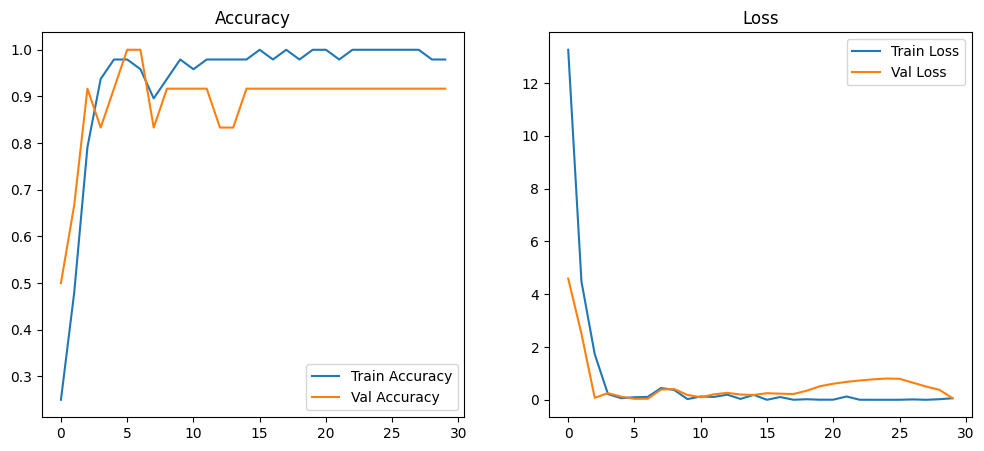

In [9]:
# Plot training and validation curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [10]:
# Save the model
model.save("voice_emotion_model.keras")
print("Model saves as voice_emotion_model.keras")

Model saves as voice_emotion_model.keras
